In [17]:
import pandas as pd
import numpy as np
from lazypredict.Supervised import LazyRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
import matplotlib.pyplot as plt

In [2]:
X_train = pd.read_csv('/workspaces/ML-Algorithm/data/processed/X_train.csv')
X_train.head(3)

,age,job,marital,education,default,contact,month,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,-0.60,-1.00,1.00,-0.40,0.00,0.00,-0.67,-0.76,3.00,0.00,0.00,-0.91,-0.93,-0.70,-0.98,-0.71
1,-0.20,-0.50,1.00,0.60,0.00,-1.00,-0.67,-0.20,-0.50,0.00,0.00,0.00,0.27,0.86,0.00,0.00
2,0.80,0.00,0.00,-0.60,0.00,0.00,-0.33,-0.20,1.00,1.00,1.00,-0.87,0.33,0.32,-1.13,-1.55


In [3]:
X_test = pd.read_csv('/workspaces/ML-Algorithm/data/processed/X_test.csv')
X_test.head(3)

,age,job,marital,education,default,contact,month,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,-0.53,-1.00,1.00,-0.40,0.00,0.00,-0.67,0.37,0.00,0.00,0.00,-0.91,-1.07,-0.70,-0.97,-0.71
1,0.33,1.50,0.00,0.60,0.00,0.00,1.00,-0.56,-0.50,1.00,1.00,-0.38,-0.74,-0.03,-0.20,0.04
2,-0.93,0.00,0.00,0.00,0.00,0.00,2.00,-0.01,-0.50,0.00,0.00,-0.91,-0.87,-0.84,-0.95,-0.71


In [4]:
y_train = pd.read_csv('/workspaces/ML-Algorithm/data/processed/y_train.csv')
y_train.head(3)

,y
0,0
1,0
2,0


In [5]:
y_test = pd.read_csv('/workspaces/ML-Algorithm/data/processed/y_test.csv')
y_test.head(3)

,y
0,0
1,0
2,0


In [6]:
reg = LazyRegressor()
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

  0%|          | 0/42 [00:00<?, ?it/s]

100%|██████████| 42/42 [24:59<00:00, 35.71s/it]   

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002758 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 32938, number of used features: 16
[LightGBM] [Info] Start training from score 0.113425


In [7]:
print(models)

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
GradientBoostingRegressor                    0.41       0.41  0.24        3.52
LGBMRegressor                                0.40       0.40  0.24        0.25
HistGradientBoostingRegressor                0.39       0.40  0.24        0.39
MLPRegressor                                 0.39       0.39  0.24        4.64
RandomForestRegressor                        0.38       0.38  0.25        8.71
XGBRegressor                                 0.36       0.36  0.25        0.35
ExtraTreesRegressor                          0.36       0.36  0.25        4.17
BaggingRegressor                             0.33       0.33  0.26        0.92
BayesianRidge                                0.31       0.32  0.26        0.15
ElasticNetCV                                 0.31       0.32  0.26        0.47
LassoCV                                      0.31   

In [9]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [14]:
print(f"Intercep (a): {model.intercept_}")

Intercep (a): [-3.89177816]


In [15]:
print(f"Coefficients: {model.coef_}")

Coefficients: [[ 0.03288247  0.03817485  0.06261368  0.21131101 -0.38460684  0.81190412
   0.20177318  1.01634391 -0.07218073 -0.30792211  0.68639434 -2.77833852
   1.24163855  0.39976012  0.08089298 -0.12029892]]


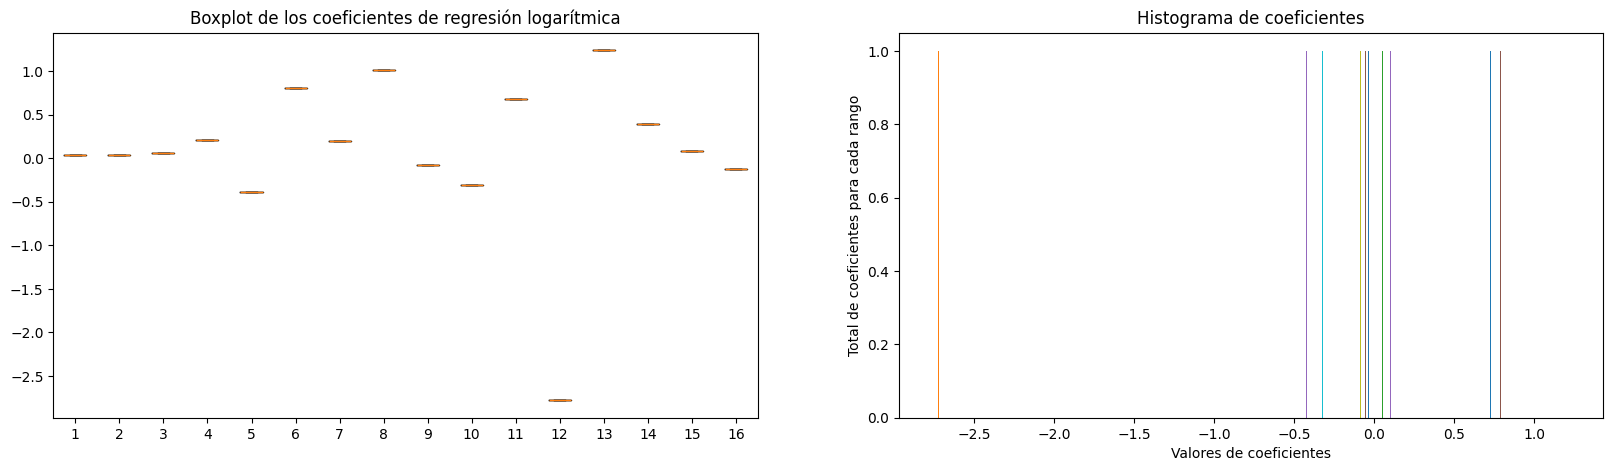

In [18]:
# Graficamos los coeficientes calculados
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.boxplot(model.coef_)
plt.title('Boxplot de los coeficientes de regresión logarítmica')
plt.subplot(1, 2, 2)
plt.hist(model.coef_,50)
plt.xlabel('Valores de coeficientes')
plt.ylabel('Total de coeficientes para cada rango')
plt.title('Histograma de coeficientes')
plt.show()

In [10]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [19]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

Accuracy: 0.9085610200364299
MSE: 0.09143897996357013
R2 Score: 0.06341246581226789


Exploración métricas de rendimiento del modelo:

In [20]:
def get_metrics(yhat_test, y_test, yhat_train, y_train):
    # Calcula todas las métricas para el conjunto de entrenamiento
    r2_train = r2_score(y_train, yhat_train)
    mse_train = mean_squared_error(y_train, yhat_train)
    mae_train = mean_absolute_error(y_train, yhat_train)
    medae_train = median_absolute_error(y_train, yhat_train)
    rmse_train = mean_squared_error(y_train, yhat_train, squared=False)
    
    # Calcula todas las métricas para el conjunto de prueba
    r2_test = r2_score(y_test, yhat_test)
    mse_test = mean_squared_error(y_test, yhat_test)
    mae_test = mean_absolute_error(y_test, yhat_test)
    medae_test = median_absolute_error(y_test, yhat_test)
    rmse_test = mean_squared_error(y_test, yhat_test, squared=False)
    
    # Calcula la diferencia entre las métricas de entrenamiento y prueba
    r2_diff = r2_train - r2_test
    mse_diff = mse_train - mse_test
    mae_diff = mae_train - mae_test
    medae_diff = medae_train - medae_test
    rmse_diff = rmse_train - rmse_test
    
    # Crea el DataFrame con todas las métricas
    metrics_data = {
        'R2': [r2_train, r2_test, r2_diff],
        'MSE': [mse_train, mse_test, mse_diff],
        'MAE': [mae_train, mae_test, mae_diff],
        'MedAE': [medae_train, medae_test, medae_diff],
        'RMSE': [rmse_train, rmse_test, rmse_diff]
    }
    
    return pd.DataFrame(data=metrics_data, index=['Train set', 'Test set', 'Difference'])

In [21]:
yhat_train = model.predict(X_train)
yhat_test = model.predict(X_test)

In [22]:
get_metrics(yhat_test, y_test, yhat_train, y_train)

,R2,MSE,MAE,MedAE,RMSE
Train set,0.08,0.09,0.09,0.00,0.30
Test set,0.06,0.09,0.09,0.00,0.30
Difference,0.02,0.00,0.00,0.00,0.00
